In [5]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import visualising_data_functions as vdf
import random
from sympy.solvers import solve
from sympy import Symbol
sns.set(style="whitegrid", color_codes=True)
sns.set_context('notebook')
sns.set_palette("bone")

![](model system with k6.png)

In [8]:
##OPEN FILE

filename = 'cell_population_counts_original.xlsx'

dfAll = pd.read_excel(open(filename,'rb'), sheetname='AllData') #make df from spreadsheet
dfAll = dfAll.fillna(0) #replace 'None' cells with 0

In [9]:
##DEFINE CONDITIONS
positions = dfAll.position.unique()
light_conditions = dfAll.light.unique()
ages = dfAll.age.unique()
cell_types = dfAll.cellType.unique() # ['PC' 'SLGC' 'MC' 'GMC' 'Stomata']
condition_type = dfAll.leafCondition.unique()


condition0 = (50, 'young','mid') 
condition1 = (50, 'medium', 'mid')
condition2 = (50, 'mature', 'mid')

conditions = (condition0, condition1, condition2)

In [10]:
i = 2
cell_types_dict = {}
for i in range(len(cell_types)):
    condition_dict = {}
    for j in conditions:
        
        cellTypeCount = vdf.cellTypeCountExtract(dfAll, j, cell_types, i)
        totalCellCount = vdf.totalCellCount(dfAll, j, cell_types)
        avg_cell_size = [1/x for x in totalCellCount]
        avg_avg_cell_size = sum(avg_cell_size)/float(len(avg_cell_size))
        proportion_cell_count = cellTypeCount/totalCellCount
        avgCellTypeCount =  sum(cellTypeCount)/float(len(cellTypeCount))
        avgTotalCellCount = sum(totalCellCount)/float(len(totalCellCount))
        effective_cell_count = cellTypeCount * avg_cell_size
        avg_effective_cell_count = avgCellTypeCount * avg_avg_cell_size
        condition_dict[j] = [cellTypeCount, totalCellCount, avg_cell_size, avg_avg_cell_size, 
                             proportion_cell_count, avgCellTypeCount,avgTotalCellCount, 
                             effective_cell_count, avg_effective_cell_count ]
    cell_types_dict[cell_types[i]] = condition_dict

In [11]:
Stomata = (np.asanyarray([cell_types_dict['Stomata'][j][7] for j in conditions]))
Stomata_avg = np.ndarray.flatten(np.asanyarray([cell_types_dict['Stomata'][j][8] for j in conditions]))
GMC = (np.asanyarray([cell_types_dict['GMC'][j][7] for j in conditions]))
GMC_avg = np.ndarray.flatten(np.asanyarray([cell_types_dict['GMC'][j][8] for j in conditions]))
PC = (np.asanyarray([cell_types_dict['PC'][j][7] for j in conditions]))
PC_avg = np.ndarray.flatten(np.asanyarray([cell_types_dict['PC'][j][8] for j in conditions]))
MC = (np.asanyarray([cell_types_dict['MC'][j][7] for j in conditions]))
MC_avg = np.ndarray.flatten(np.asanyarray([cell_types_dict['MC'][j][8] for j in conditions]))
SLGC = (np.asanyarray([cell_types_dict['SLGC'][j][7] for j in conditions]))
SLGC_avg = np.ndarray.flatten(np.asanyarray([cell_types_dict['SLGC'][j][8] for j in conditions]))
PC_count = (np.asanyarray([cell_types_dict['PC'][j][7] for j in conditions]))
SLGC_count = (np.asanyarray([cell_types_dict['Stomata'][j][7] for j in conditions]))
MC_count = (np.asanyarray([cell_types_dict['MC'][j][7] for j in conditions]))

print(PC_count,'\n\n', SLGC_count,'\n\n', MC)

[[ 0.11219512  0.12542373  0.05504587  0.10240964  0.109375    0.07777778]
 [ 0.09146341  0.11666667  0.06896552  0.08695652  0.15337423  0.12837838]
 [ 0.24444444  0.1875      0.08695652  0.11666667  0.0862069   0.14084507]] 

 [[ 0.10731707  0.05084746  0.10091743  0.05120482  0.109375    0.07777778]
 [ 0.07926829  0.125       0.11494253  0.11801242  0.08588957  0.10135135]
 [ 0.24444444  0.1875      0.26086957  0.21666667  0.27586207  0.21126761]] 

 [[ 0.07317073  0.12542373  0.0733945   0.1626506   0.16796875  0.08888889]
 [ 0.14634146  0.08333333  0.09195402  0.09937888  0.10429448  0.10135135]
 [ 0.          0.          0.          0.          0.          0.        ]]


## calculating k1(t1 - t0) and k1(t2-t1)

- $ {k_1 (t_1 - t_0)} = {\frac{Stomata(t_1)-Stomata(t_0)}{GMC( t_0)}} $


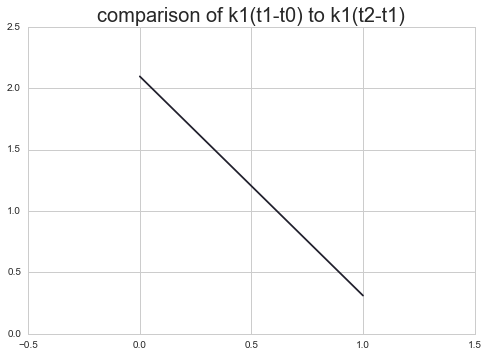

In [12]:
#step one from sheet

t2_t1_k1_avg = (Stomata_avg[2]-Stomata_avg[1])/(GMC_avg[1]) 
t1_t0_k1_avg = (Stomata_avg[1]-Stomata_avg[0])/(GMC_avg[0])

plt.plot([0,1], [t2_t1_k1_avg, t1_t0_k1_avg])
t2List = [0,0,0,0,0,0]
t1List = [0,0,0,0,0,0]
plt.xlim(-0.5, 1.5)
plt.title('comparison of k1(t1-t0) to k1(t2-t1)', size = 20)
plt.savefig('k1_k0.svg')

Calculating the ratio of k0 to k1:

In [13]:
t1_t0_k0 = (GMC_avg[1]-GMC_avg[0]+t1_t0_k1_avg*GMC_avg[0])/MC_avg[0]

k0_by_k1 = t1_t0_k0/t1_t0_k1_avg

print(k0_by_k1)

0.177274961306


## consistency check on t1-t0

- ${k_1 (t_1 - t_0)} = {\frac{GMC(t_1)-GMC(t_0)+ \frac{k_0}{k_1}MC(t_0) - GMC(t_0)}{MC( t_0)}} $


1.48281507436 2.09679758068


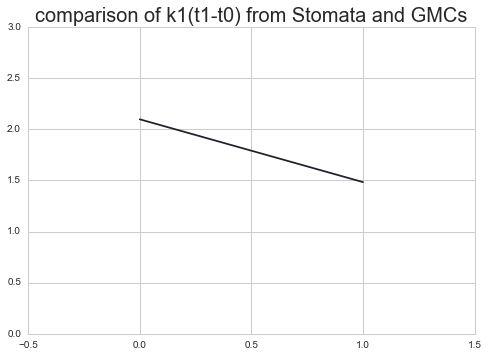

In [14]:
k1_check = (GMC_avg[2]-GMC_avg[1])/(k0_by_k1*MC_avg[1]-GMC_avg[1])
print(k1_check, t2_t1_k1_avg)

plt.plot([0,1], [t2_t1_k1_avg, k1_check])
plt.xlim(-0.5, 1.5)
plt.ylim(0,3)
plt.title('comparison of k1(t1-t0) from Stomata and GMCs', size = 20)

## Calculating k4/ k1 and k5/ k1:

- ${PC(t_1)-PC(t_0}) = { k_1 (t_1 - t_0) [\frac{k_5}{k1} PC(t_0 ) + \frac{k_4}{k1} SLGC(t_0)]}$
- ${PC(t_2)-PC(t_1}) = { k_1 (t_2 - t_1) [\frac{k_5}{k1} PC(t_1 ) + \frac{k_4}{k1} SLGC(t_1)]}$

In [15]:
a = PC_avg[1]-PC_avg[0]
e = PC_avg[2]-PC_avg[1]
f = np.array([a,e])
b = [t1_t0_k1_avg*PC_avg[0], t1_t0_k1_avg*SLGC_avg[0]]
c = [t1_t0_k1_avg*PC_avg[1], t1_t0_k1_avg*SLGC_avg[1]]
d = np.array([b,c])

x = np.linalg.solve(d, f)

k5_by_k1 = x[0]
k4_by_k1 = x[1]

print(k5_by_k1, k4_by_k1)

4.98444220359 -0.735772419491


## Calculating k3/ k1 and k6/ k1:

- ${SLGC(t_1)-SLGC(t_0)} = { k_1 (t_1 - t_0) [\frac{k_3}{k1} MC(t_0 ) +\frac{k_6}{k1} \frac{k_4}{k1} SLGC(t_0)]}$
    
- ${SLGC(t_2)-SLGC(t_1)} = { k_1 (t_2 - t_1) [\frac{k_3}{k1} MC(t_1 ) + \frac{k_6}{k1} \frac{k_4}{k1} SLGC(t_1)]}$

In [16]:
a1 = SLGC_avg[1]-SLGC_avg[0]
e1 = SLGC_avg[2]-SLGC_avg[1]
f1 = np.array([a1,e1])
b1 = [t1_t0_k1_avg*MC_avg[0], t1_t0_k1_avg*k4_by_k1*SLGC_avg[0]]
c1 = [t1_t0_k1_avg*MC_avg[1], t2_t1_k1_avg*k4_by_k1*SLGC_avg[1]]
d1 = np.array([b,c])

x1 = np.linalg.solve(d1, f1)

k3_by_k1 = x1[0]
k6_by_k1 = x1[1]

print(k3_by_k1, k6_by_k1)

-4.37702911214 0.720670569476


## Calculating k2/ k1:

- ${Mc(t_1)-MC(t_0}) = { k_1 (t_1 - t_0) [\frac{k_2}{k_1}-(\frac{k_3}{k_1}+\frac{k_0}{k_1}) MC(t_0 ) +\frac{k_6}{k_1} SLGC(t_0)]}$
    
- ${Mc(t_2)-MC(t_1}) = { k_1 (t_2 - t_1) [\frac{k_2}{k_1}-(\frac{k_3}{k_1}+\frac{k_0}{k_1}) MC(t_1 ) +\frac{k_6}{k_1} SLGC(t_1)]}$

21.9151599933 19.531151537


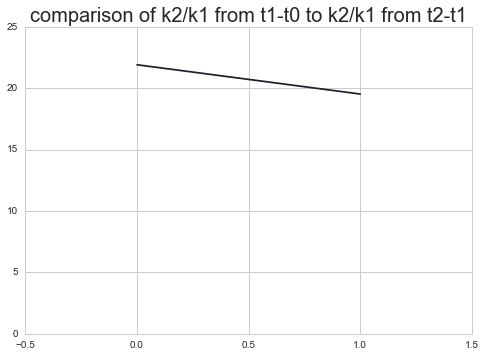

In [17]:
k2_by_k1_v1 = (k3_by_k1 + k0_by_k1)*MC_avg[0] + k6_by_k1 + SLGC_avg[0] - (t1_t0_k1_avg / (MC_avg[1]-MC_avg[0]))

k2_by_k1_v2 = (k3_by_k1 + k0_by_k1)*MC_avg[1] + k6_by_k1 + SLGC_avg[1] - (t2_t1_k1_avg / (MC_avg[2]-MC_avg[1]))

print(k2_by_k1_v1, k2_by_k1_v2)

plt.plot([0,1], [k2_by_k1_v1, k2_by_k1_v2])
plt.xlim(-0.5, 1.5)
plt.ylim(0,25)
plt.title('comparison of k2/k1 from t1-t0 to k2/k1 from t2-t1', size = 20)

In [18]:
kvalues = [k0_by_k1, t1_t0_k1_avg, k2_by_k1_v2, k3_by_k1, k4_by_k1, k5_by_k1, k6_by_k1]
knames = ['k0/k1', 'k1(t1-t0)', 'k2/k1','k3/k1','k4/k1', 'k5/k1', 'k6/k1']
df = pd.DataFrame(kvalues, knames)
df

,0
k0/k1,0.177275
k1(t1-t0),0.311475
k2/k1,19.531152
k3/k1,-4.377029
k4/k1,-0.735772
k5/k1,4.984442
k6/k1,0.720671
